# Seleccion de Características

In [2]:
import pandas

## Carga de Datos, Etiquetas y Características

In [4]:
# Load data, labels and features

folder = "/home/agustin/Documentos/Tesis/datos/40mhz/"
data_file = "brc-2002_086400-02-output.csv.gz"
label_file = "brc-2002_086400-02-output_true_labels.csv.gz"
feature_file = "brc-2002_086400-02-output_features.csv.gz"

# data = pandas.read_csv(folder + data_file, compression='gzip')
labels = pandas.read_csv(folder + label_file, compression='gzip')
features = pandas.read_csv(folder + feature_file, compression='gzip')



In [5]:
one_hot = pandas.get_dummies(labels['class_detailed'])

data_combined = pandas.concat([features, one_hot], axis=1)

data_combined

,amplitude,width,rise_time,fall_time,area,ascending_slope,descending_slope,energy,symmetry,bandwidth,eElectrons,eHadronic,eMuonicN,eMuonicP,eNeutrons,ePhotons,ePions,ePositrons,eProtons
0,5.000000,288,0,301,7.916798,-6.969745,-6.748713,18.110838,0.000000,0.9990,False,False,True,False,False,False,False,False,False
1,0.999919,98,40,37,1.166629,1.819820,-1.499536,0.904762,1.081081,0.6660,False,False,False,False,False,True,False,False,False
2,54.000000,182,0,206,110.708851,-27.453940,-25.813449,3357.261814,0.000000,0.7326,False,False,True,False,False,False,False,False,False
3,11.000000,244,0,347,32.500000,-0.022410,-4.957702,250.856833,0.000000,0.5328,False,False,True,False,False,False,False,False,False
4,33.000000,158,0,225,75.500000,-0.083723,-20.239008,1624.891090,0.000000,0.5994,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940580,63.000000,153,0,187,129.500225,-12.071892,-27.526622,4801.317647,0.000000,0.7326,False,False,False,True,False,False,False,False,False
940581,67.000000,129,0,147,129.833483,-8.159559,-38.960350,5247.839228,0.000000,0.7992,False,False,False,True,False,False,False,False,False
940582,2.000000,155,0,81,4.000000,0.000000,-1.333108,6.885714,0.000000,0.6660,True,False,False,False,False,False,False,False,False
940583,91.000000,171,0,247,174.875817,-43.416577,-40.914538,8381.971334,0.000000,0.7992,False,False,False,False,False,False,False,True,False


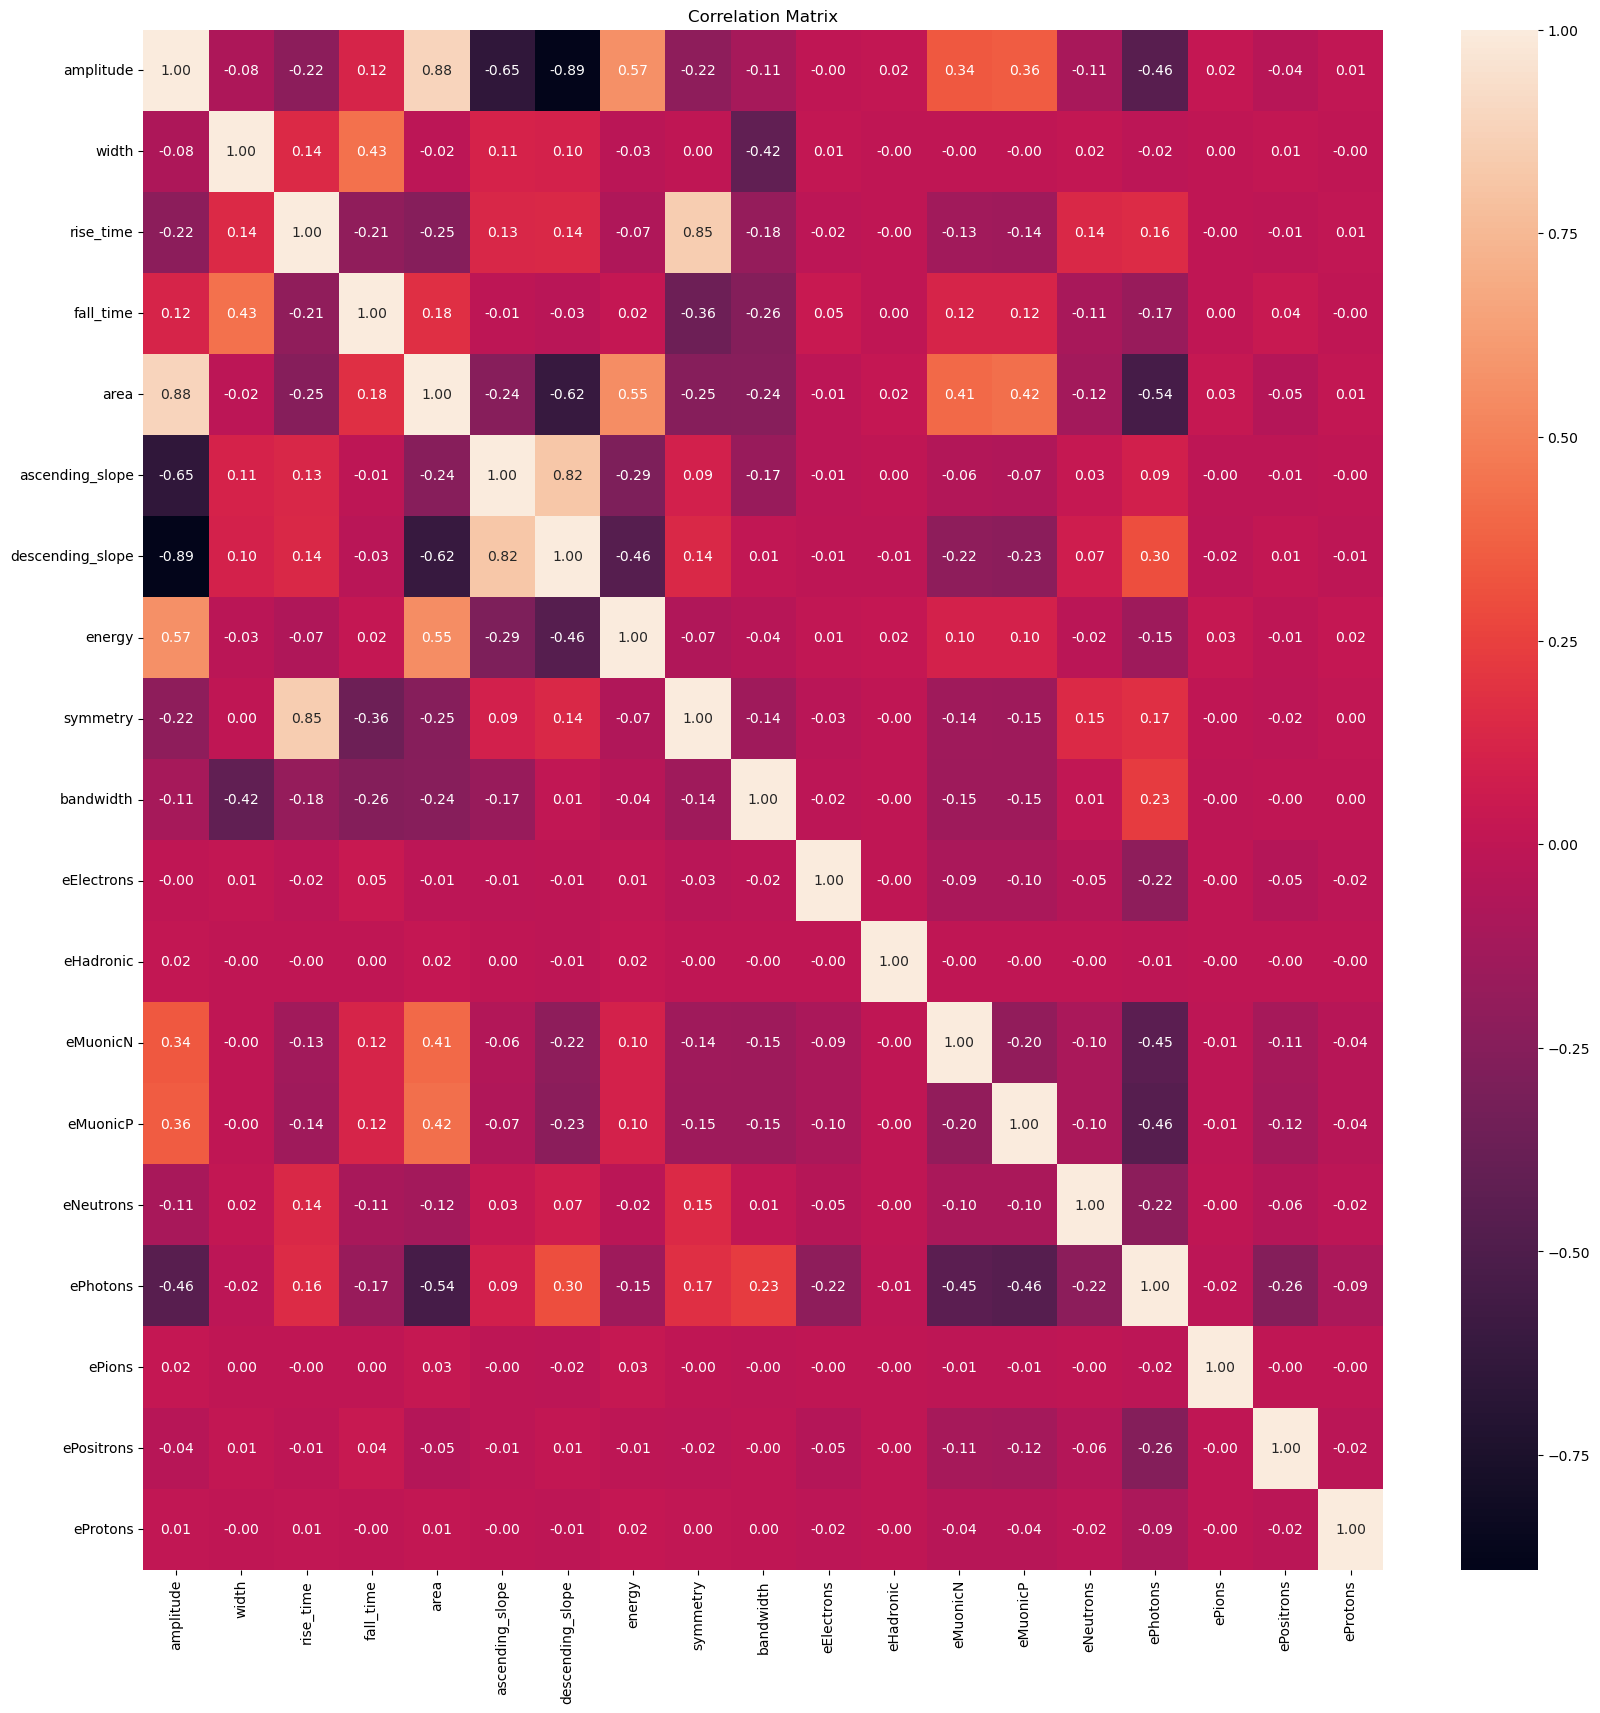

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_combined.corr()

##export plot to file 
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")



In [8]:
high_corr = corr.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr > 0.8]
high_corr = high_corr[high_corr < 1]
high_corr = high_corr.drop_duplicates()

print(high_corr)


amplitude         descending_slope    0.890599
area              amplitude           0.884408
rise_time         symmetry            0.847864
descending_slope  ascending_slope     0.819588
dtype: float64


## Visualization

In [ ]:
import os

# Create directories for each type of graph
os.makedirs("histograms", exist_ok=True)
os.makedirs("boxplots", exist_ok=True)
os.makedirs("pairplots", exist_ok=True)
os.makedirs("scatter_plots", exist_ok=True)
os.makedirs("violin_plots", exist_ok=True)

# Plot histograms for each feature
for col in features.columns:
    plt.figure(figsize=(10, 5))
    plt.hist(data_combined[col], bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.savefig(f"histograms/histogram_{col}.png")
    plt.close()

# Plot boxplots for each feature
for col in features.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data_combined[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.savefig(f"boxplots/boxplot_{col}.png")
    plt.close()
# Plot pairplots for each feature
for col in features.columns:
    plt.figure(figsize=(10, 5))
    sns.pairplot(data_combined, x_vars=[col], y_vars=[col], diag_kind='kde')
    plt.title(f"Pairplot of {col}")
    plt.savefig(f"pairplots/pairplot_{col}.png")
    plt.close()
# Plot scatter plots for each feature
for col in features.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=data_combined[col], y=data_combined['class_detailed'])
    plt.title(f"Scatter plot of {col} vs class_detailed")
    plt.xlabel(col)
    plt.ylabel("class_detailed")
    plt.savefig(f"scatter_plots/scatter_{col}.png")
    plt.close()
# Plot violin plots for each feature
for col in features.columns:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=data_combined[col], y=data_combined['class_detailed'])
    plt.title(f"Violin plot of {col} vs class_detailed")
    plt.xlabel(col)
    plt.ylabel("class_detailed")
    plt.savefig(f"violin_plots/violin_{col}.png")
    plt.close()


